# Simulation einer Kreisbewegung

## Importe

Python-Bibliotheken, die benötigte Funktionalitäten enthalten.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Startwerte

Hier sollen die Startwerte zur Berechnung der Kreisbewegung eingegeben werden.

<div class="alert alert-block alert-warning">
<b>Aufgabe:</b> 
    
Geben Sie sinnvolle Startwerte für die einzlnen Variablen ein.
</div>

In [2]:
r = 1                            # Kreisradius in m
T = 1                            # Umlaufzeit in s
x = -r                           # Startwert des Punktes auf der x-Achse
y = 0                            # Startwert des Punktes auf der y-Achse
omega = float(2*np.pi/T)         # Winkelgeschwindigkeit
vx = 0                           # Startwert für x-Komponente der Geschwindigkeit
vy = omega*r                     # Startwert für die y-Komponente der Geschwindigkeit
a0 = omega**2*r                  # Zentripetalbeschleunigung
dt = float(T/100)                # Intervall von Umlaufzeit

## Definition der Bewegungsgleichungen
<img src='kreis.png' alt='Kreisbewegung' style='width: 50%;'/>

<div class="alert alert-block alert-warning">
<b>Aufgabe:</b> 
<ul>
Es sollen Bewegungsgleichungen für die Kreisbewegung festgelegt werden. Stellen Sie jeweils eine Bewegungsgleichung für 
    <li> die Ortskoordinaten x und y. Zur Berechnung sollen die vorherige Ortskoordinate sowie die Geschwindigkeit vx bzw. vy und ein Zeitintervall dt verwendet werden. </li>
    <li> die Geschwindigkeitskomponenten in x- und y-Richtung. Zur Berechnung sollen die vorherige Geschwindigkeit vx bzw. vy sowie die Beschleunigung ax bzw. ay und ein Zeitintervall dt verwendet werden. </li>
    <li> die Komponenten der Zentripetalbeschleunigung in x- und in y-Richtung. Zur Berechnung sollen die Ortskoordinaten x und y sowie die Zentripetalbeschleunigung a0 verwendet werden. Beachten Sie, dass die Bewegungsrichtung <b>gegen den Uhrzeigersinn</b> erfolgen soll (Tipp: Wahl des Vorzeichens).</li>
</ul>
    
Nutzen Sie die obige Abbildung zum Finden der Bewegungsgleichungen zur Zentripetalbeschleunigung. Blau: Auftragung der Ortskoordinaten x und y. Orange: Auftragung der x- und y-Komponente der Beschleunigung. Beachte: Der Betrag der Zentripetalbeschleunigung ist wesentlich größer als der Betrag der Ortskoordinaten.
</div>


Tipps zur Programmierung: 

* $\sqrt(x)$ wird in Python als np.sqrt(x) geschrieben.
* $x^{2}$ wird in Python als x**2 geschrieben.
* $\frac{x}{y}$ wird in Python als x/y geschrieben.
* der Funktionswert x wird mit return x zurückgegeben.

<div class="alert alert-block alert-warning">
<b>Aufgabe:</b> 
    
Variieren Sie die Startwerte und beobachten Sie die Auswirkungen auf die Berechnung.
</div>

In [3]:
#Funktionen
def next_ax(x,y,a0):
    ax_neu = -a0*x/r
    return ax_neu

def next_ay(x,y,a0):
    ay_neu = -a0*y/r
    return ay_neu

def next_vx(vx,ax,dt):
    vx_neu = vx+ax*dt
    return vx_neu

def next_vy(vy,ay,dt):
    vy_neu = vy+ay*dt
    return vy_neu

def next_x(x,vx,dt):
    x_neu = x+vx*dt
    return x_neu

def next_y(y,vy,dt):
    y_neu = y+vy*dt
    return y_neu

## Initialisierung und Rechnung

Die oben eingegebenen Gleichungen sollen nun zur Berechnung der Kreisbewegung herangezogen werden.

### Initialisierung

* Die Umlaufzeit T wird in gleiche Intervalle dt unterteilt. 
* Für jede zu berechnende Größe wird eine Liste zum Aufnehmen der Werte erstellt.


### Berechnen

* Die Berechnungen werden so oft durchlaufen, wie es Einträge in der Liste t gibt.
* Mit Hilfe der oben erstellten Funktionen werden für jedes dt alle Werte berechnet und in der entsprechenden Liste gespeichert.
* Die am Ende erhaltenen x- und y-Werte dienen als Ausgangspunkt für eine neue "Berechnungsrunde".

<div class="alert alert-block alert-warning">
<b>Aufgabe:</b> 
    
<b>Begründen</b> Sie, warum zuerst die Beschleunigung, dann die Geschwindigkeit und schliesslich die Ortskoordinaten berechnet werden müssen.
</div>

In [4]:
#Initialisierung
t = np.arange(0,T+dt,dt)            # Liste der Zeitpunkte zu denen alle "Messwerte" bestimmt werden sollen
arr_x = []                          # Liste der berechneten x-Werte
arr_y = []                          # Liste der berechneten y-Werte
arr_ax = []                         # Liste der x-Komponente der Beschleunigung
arr_ay = []                         # Liste der y-Komponente der Beschleunigung
arr_vx = []                         # Liste der x-Komponente der Geschwindigkeit
arr_vy = []                         # Liste der y-Komponente der Geschwindigkeit

arr_a = []

#Berechnen
for i in t:
    ax = next_ax(x,y,a0)            # Wert für ax mit Hilfe der obigen Gleichung berechnen
    ay = next_ay(x,y,a0)            # Wert für ay mit Hilfe der obigen Gleichung berechnen
    a = np.sqrt(ax**2+ay**2)
    arr_ax.append(ax)               # ax und ay werden jeweils in der Liste gespeichert.
    arr_ay.append(ay)
    arr_a.append(a)
    
    vx = next_vx(vx,ax,dt)          # Entsprechendes Vorgehen für die Geschwindigkeiten.
    vy = next_vy(vy,ay,dt)
    arr_vx.append(vx)
    arr_vy.append(vy)
    
    x_neu = next_x(x,vx,dt)         # Entsprechendes Vorgehen für die x und y-Werte
    y_neu = next_y(y,vy,dt)
    arr_x.append(x_neu)
    arr_y.append(y_neu)
    x = x_neu                       # Neu berechneter x-Wert gilt als Ausgangspunkt zur Berechnung der neuen Bschleunigung ax
    y = y_neu                       # Neu berechneter x-Wert gilt als Ausgangspunkt zur Berechnung der neuen Bschleunigung ax

## Visualisierung

Mit Hilfe der zuvor erstellten Listen lassen sich verschiedene Diagramme zur Kreisbewegung erzeugen. Der hier stehende Python Code sollte nicht verändert werden.

<div class="alert alert-block alert-warning">
<b>Aufgabe:</b> 
<ul>    
    <li>Durch welche Funktionen lassen sich x(t), vx(t) und ax(t) beschreiben?</li>
    <li>Durch welche Funktionen lassen sich y(t), vy(t) und ay(t) beschreiben?</li>
    <li>Überlegen Sie, wie die Bewegungsgleichungen für Weg, Geschwindigkeit und Beschleunigung zusammenhängen. <b>Zeigen</b> Sie, dass das auch bei der Kreisbewegung der Fall ist.</li>
</ul>
</div>

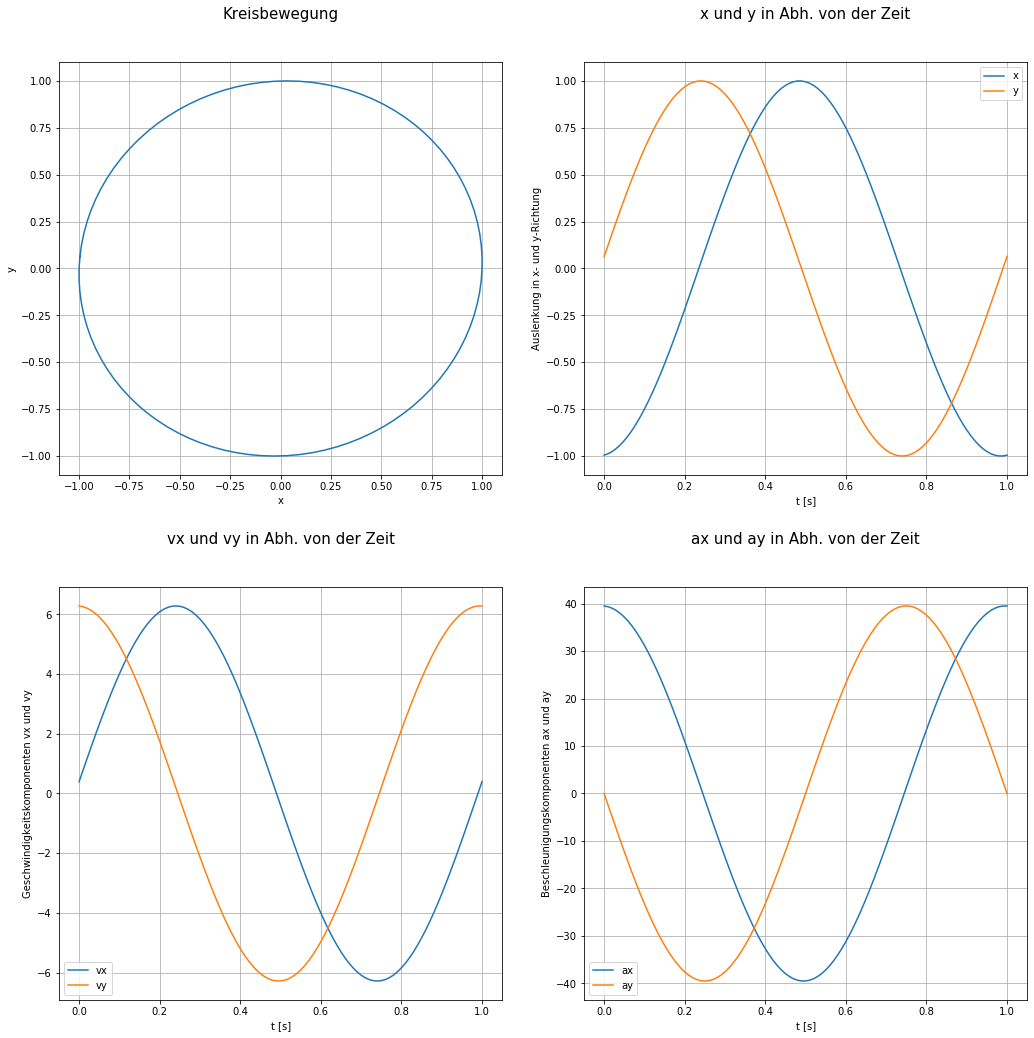

In [5]:
fig = plt.figure(figsize=(15,15))                       # Die x- und y-Koordinaten werden gegeneinander aufgetragen
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(arr_x, arr_y, '-')
ax1.set_title("Kreisbewegung",y=1.09, fontsize = 15)
ax1.set_ylabel("y")
ax1.set_xlabel("x")
ax1.grid(which='major',axis='both')

ax2 = fig.add_subplot(2, 2, 2)                          # x und y werden als Funktion der Zeit aufgetragen
ax2.plot(t, arr_x, '-', label= "x")
ax2.plot(t, arr_y, '-', label = "y")
ax2.set_title("x und y in Abh. von der Zeit",y=1.09, fontsize = 15)
ax2.set_ylabel("Auslenkung in x- und y-Richtung")
ax2.set_xlabel("t [s]")
ax2.grid(which='major',axis='both')
ax2.legend()

ax3 = fig.add_subplot(2, 2, 3)                         # vx und vy werden als Funktion der Zeit aufgetragen
ax3.plot(t, arr_vx, '-', label= "vx")
ax3.plot(t, arr_vy, '-', label = "vy")
ax3.set_title("vx und vy in Abh. von der Zeit",y=1.09, fontsize = 15)
ax3.set_ylabel("Geschwindigkeitskomponenten vx und vy")
ax3.set_xlabel("t [s]")
ax3.grid(which='major',axis='both')
ax3.legend()

ax4 = fig.add_subplot(2, 2, 4)                        # ax und ay werden als Funktion der Zeit aufgetragen
ax4.plot(t, arr_ax, '-', label= "ax")
ax4.plot(t, arr_ay, '-', label = "ay")
ax4.set_title("ax und ay in Abh. von der Zeit",y=1.09, fontsize = 15)
ax4.set_ylabel("Beschleunigungskomponenten ax und ay")
ax4.set_xlabel("t [s]")
ax4.grid(which='major',axis='both')
ax4.legend()

plt.tight_layout(pad = 3)
plt.savefig("Kreisbewegung.png")
plt.show()

<div class="alert alert-block alert-warning">
<b>Aufgabe:</b> 
    <b>Zeigen</b> Sie durch ein eigenes Programm, dass die Zentripetalbeschleunigung konstant ist. Bilden Sie hierzu den Mittelwert np.mean() aus dem Array für die Mittelwerte arr_a und vergleichen Sie diesen mit dem zuvor verwendeten Wert a0.
</div>